<a href="https://colab.research.google.com/github/Aayushi-Mishra/Dematel-analysis/blob/main/Dematel_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEMATEL ANALYSIS**

## **Data cleaning**

In [ ]:
!pip install adjustText

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from adjustText import adjust_text

surveys_df = pd.read_csv('/content/test_surveys.csv')

# Initialize an empty list to store the transformed data
transformed_data = []

# Iterate through each survey record
for _, survey in surveys_df.iterrows():
    survey_id = survey['_id']
    num_questions = 25  # Assuming there are always 25 questions

    for i in range(num_questions):
        question_number = survey[f'responses[{i}].questionNumber']
        response = survey[f'responses[{i}].response']
        response_id = survey[f'responses[{i}]._id']

        transformed_data.append({
            '_id': survey_id,
            'questionNumber': question_number,
            'response': response,
            'response_id': response_id
        })

# Convert the list to a DataFrame
transformed_df = pd.DataFrame(transformed_data)
# transformed_data

# Save the transformed data to a new CSV file
output_csv_path = 'transformed_surveys_final.csv'
transformed_df.to_csv(output_csv_path, index=False)


# df = pd.read_csv('/content/transformed_surveys_final.csv')
transformed_df.drop(columns=['response_id'], inplace=True)
# df
# pivot the data
df_pivot = transformed_df.pivot_table(index='_id', columns='questionNumber', values='response', aggfunc='mean')
df_pivot.columns = [f'Q{int(col)}' for col in df_pivot.columns]
df_pivot.reset_index(inplace=True)
output_csv_path = 'df_pivot.csv'
df_pivot.to_csv(output_csv_path, index=False)
df_pivot




,_id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25
0,664afb65a754094ba6f12050,5.0,3.0,4.0,1.0,3.0,5.0,4.0,2.0,4.0,...,4.0,5.0,1.0,4.0,3.0,4.0,3.0,2.0,4.0,5.0
1,664afb65a754094ba6f12069,5.0,3.0,4.0,1.0,3.0,5.0,4.0,2.0,4.0,...,4.0,5.0,1.0,4.0,3.0,4.0,3.0,2.0,4.0,5.0
2,664f7298dcf1c5a8416f6dd5,5.0,4.0,2.0,4.0,5.0,4.0,3.0,5.0,4.0,...,4.0,3.0,4.0,5.0,4.0,2.0,1.0,5.0,3.0,5.0
3,664f7298dcf1c5a8416f6dee,5.0,4.0,2.0,4.0,5.0,4.0,3.0,5.0,4.0,...,4.0,3.0,4.0,5.0,4.0,2.0,1.0,5.0,3.0,5.0
4,664f72e0dcf1c5a8416f6df4,3.0,5.0,1.0,1.0,2.0,2.0,3.0,2.0,1.0,...,1.0,1.0,4.0,3.0,2.0,1.0,3.0,4.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,6655e8fb70b4cd6c78d918a0,4.0,3.0,4.0,1.0,4.0,5.0,1.0,5.0,4.0,...,3.0,2.0,1.0,3.0,2.0,2.0,1.0,2.0,1.0,2.0
160,6655fe3b8806c9e47be43669,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,...,2.0,4.0,3.0,4.0,5.0,2.0,3.0,4.0,5.0,1.0
161,6655fe3b8806c9e47be43682,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,...,2.0,4.0,3.0,4.0,5.0,2.0,3.0,4.0,5.0,1.0
162,6656af678460dd59fe36bbac,2.0,2.0,4.0,2.0,5.0,5.0,5.0,2.0,2.0,...,1.0,1.0,2.0,5.0,3.0,4.0,2.0,5.0,2.0,2.0


## **Mapping Factors to questions and forming desicion matrix**

In [ ]:
df = df_pivot.copy()
# Create a dictionary mapping each question to its factor
question_to_factor = {
    'Q1': 'Social media',
    'Q2': 'Household environment',
    'Q3': 'Past traumas',
    'Q4': 'Physical Health',
    'Q5': 'Academic / Peer pressure',
    'Q6': 'Academic / Peer pressure',
    'Q7': 'Addictions',
    'Q8': 'Relationships',
    'Q9': 'Household environment',
    'Q10': 'Future',
    'Q11': 'Others',
    'Q12': 'Others',
    'Q13': 'Others',
    'Q14': 'Mental Health',
    'Q15': 'Physical Health',
    'Q16': 'Physical Health',
    'Q17': 'Academic / Peer pressure',
    'Q18': 'Others',
    'Q19': 'Mental Health',
    'Q20': 'Mental Health',
    'Q21': 'Others',
    'Q22': 'Relationships',
    'Q23': 'Mental Health',
    'Q24': 'Relationships',
    'Q25': 'Mental Health',
}

# Add a new column to the DataFrame for the factors
df_factors = df.melt(id_vars=["_id"], value_vars=[f"Q{i}" for i in range(1, 26)],
                     var_name="Question", value_name="Response")
df_factors["Factor"] = df_factors["Question"].map(question_to_factor)

# Group by _id and Factor and calculate the mean response for each factor
decision_matrix = df_factors.groupby(['_id', 'Factor'])['Response'].mean().unstack()
output_file_path = 'decision_matrix.csv'
decision_matrix.to_csv(output_file_path, index=False)


# Display the decision matrix (factor means) and the direct relation matrix
print("Decision Matrix:")
decision_matrix


Decision Matrix:


Factor,Academic / Peer pressure,Addictions,Future,Household environment,Mental Health,Others,Past traumas,Physical Health,Relationships,Social media
_id,,,,,,,,,,
664afb65a754094ba6f12050,4.333333,4.0,1.0,3.5,3.2,3.4,4.0,2.666667,3.000000,5.0
664afb65a754094ba6f12069,4.333333,4.0,1.0,3.5,3.2,3.4,4.0,2.666667,3.000000,5.0
664f7298dcf1c5a8416f6dd5,4.000000,3.0,5.0,4.0,4.6,3.6,2.0,4.000000,3.000000,5.0
664f7298dcf1c5a8416f6dee,4.000000,3.0,5.0,4.0,4.6,3.6,2.0,4.000000,3.000000,5.0
664f72e0dcf1c5a8416f6df4,1.666667,3.0,1.0,3.0,2.6,2.4,1.0,1.666667,2.666667,3.0
...,...,...,...,...,...,...,...,...,...,...
6655e8fb70b4cd6c78d918a0,3.666667,1.0,4.0,3.5,2.0,1.6,4.0,1.666667,2.333333,4.0
6655fe3b8806c9e47be43669,3.666667,4.0,4.0,3.5,3.6,3.0,3.0,3.333333,4.000000,3.0
6655fe3b8806c9e47be43682,3.666667,4.0,4.0,3.5,3.6,3.0,3.0,3.333333,4.000000,3.0


## **Direct Relation Matrix creation**

In [ ]:
# Extract the factors from the decision matrix
factors = decision_matrix.columns

# Number of factors
num_factors = len(factors)

# Initialize the direct relation matrix with zeros
direct_relation_matrix = np.zeros((num_factors, num_factors))

# Aggregate the scores to form the direct relation matrix
for i in range(num_factors):
    for j in range(num_factors):
        if i != j:
            # Sum the influence from each option/alternative
            direct_relation_matrix[i, j] = np.sum(decision_matrix.iloc[:, j])

# Convert to DataFrame for better readability
direct_relation_matrix_df = pd.DataFrame(direct_relation_matrix, columns=factors, index=factors)

output_file_path = 'direct_relation_matrix.csv'
direct_relation_matrix_df.to_csv(output_file_path, index=False)

# Display the direct relation matrix
direct_relation_matrix_df


Factor,Academic / Peer pressure,Addictions,Future,Household environment,Mental Health,Others,Past traumas,Physical Health,Relationships,Social media
Factor,,,,,,,,,,
Academic / Peer pressure,0.000000,610.0,592.0,593.5,509.0,512.8,482.0,544.0,515.333333,577.0
Addictions,550.666667,0.0,592.0,593.5,509.0,512.8,482.0,544.0,515.333333,577.0
Future,550.666667,610.0,0.0,593.5,509.0,512.8,482.0,544.0,515.333333,577.0
Household environment,550.666667,610.0,592.0,0.0,509.0,512.8,482.0,544.0,515.333333,577.0
Mental Health,550.666667,610.0,592.0,593.5,0.0,512.8,482.0,544.0,515.333333,577.0
Others,550.666667,610.0,592.0,593.5,509.0,0.0,482.0,544.0,515.333333,577.0
Past traumas,550.666667,610.0,592.0,593.5,509.0,512.8,0.0,544.0,515.333333,577.0
Physical Health,550.666667,610.0,592.0,593.5,509.0,512.8,482.0,0.0,515.333333,577.0
Relationships,550.666667,610.0,592.0,593.5,509.0,512.8,482.0,544.0,0.000000,577.0


## **Data Analysis using Dematel Model with Cause-effect graph**

T is                                  0         1         2         3         4  \
Factor                                                                       
Academic / Peer pressure  0.810485  0.989080  0.962735  0.964937  0.839210   
Addictions                0.892875  0.879460  0.953371  0.955551  0.831047   
Future                    0.895517  0.982358  0.858856  0.958379  0.833506   
Household environment     0.895296  0.982116  0.955957  0.860584  0.833301   
Mental Health             0.907907  0.995950  0.969422  0.971639  0.760191   
Others                    0.907332  0.995320  0.968808  0.971023  0.844503   
Past traumas              0.912012  1.000453  0.973805  0.976031  0.848859   
Physical Health           0.902641  0.990173  0.963799  0.966003  0.840137   
Relationships             0.906950  0.994900  0.968400  0.970614  0.844147   
Social media              0.897731  0.984787  0.958556  0.960748  0.835567   

                                 5         6         7    

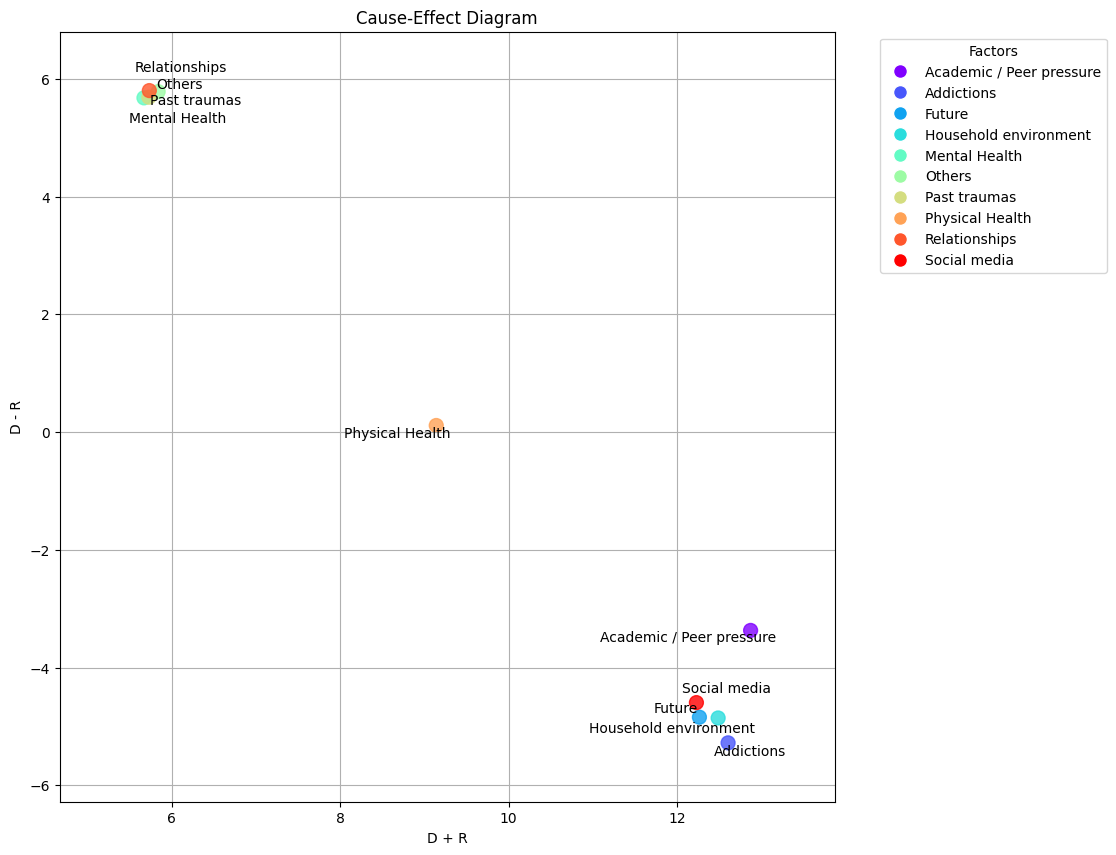

In [ ]:
def dematel_method(dataset):
  # Normalize direct relation matrix
  row_sum = np.max(np.sum(dataset, axis = 1))
  col_sum = np.max(np.sum(dataset, axis = 0))
  max_sum = max(row_sum,col_sum)
  # Total Relation Matrix
  X = dataset/max_sum
  Y = np.linalg.inv(np.identity(dataset.shape[0]) - X)
  T = np.matmul (X, Y)
  total_matrix = pd.DataFrame(T)
  output_file_path = 'Total_matrix.csv'
  total_matrix.to_csv(output_file_path, index=False)
  print('T is',T)
  # Calculate the threshold value
  threshold = np.mean(T)
  print(threshold)
  # Apply the threshold
  T_matrix = np.where(T >= threshold, T, 0)
  print('Threshold matrix is', T_matrix)
  D = np.sum(T_matrix, axis = 1) #sum of rows
  print('D is',D)
  R = np.sum(T_matrix, axis = 0) #sum of columns
  print('R is',R)
  D_plus_R   = D + R # Most Importante Criteria
  D_minus_R  = D - R # +Influencer Criteria, - Influenced Criteria
  print(D_plus_R)
  print(D_minus_R)
  factors = ['Academic / Peer pressure', 'Addictions', 'Future', 'Household environment', 'Mental Health', 'Others', 'Past traumas', 'Physical Health', 'Relationships', 'Social media' ]
  final_output_matrix = pd.DataFrame({
      'Factor': factors,
      'D (sum of rows)': D,
      'R (sum of columns)': R,
      'D+R (Prominence)': D_plus_R,
      'D-R (Relation)': D_minus_R
      })
  output_file_path = 'final_output_matrix.csv'
  final_output_matrix.to_csv(output_file_path, index=False)
  print(final_output_matrix)

  # Generate a list of unique colors for each factor
  colors = cm.rainbow(np.linspace(0, 1, len(factors)))

  # Jittering to avoid overlap
  jitter = 0.2
  D_plus_R_jittered = D_plus_R + np.random.uniform(-jitter, jitter, size=D_plus_R.shape)
  D_minus_R_jittered = D_minus_R + np.random.uniform(-jitter, jitter, size=D_minus_R.shape)

  # Create the plot
  plt.figure(figsize=(10, 10))
  scatter = plt.scatter(D_plus_R_jittered, D_minus_R_jittered, c=colors, alpha=0.8, s=100)

  # Annotate the points with factor names
  texts = []
  for i, factor in enumerate(factors):
    texts.append(plt.text(D_plus_R_jittered[i], D_minus_R_jittered[i], factor, ha='center', va='center'))

  # Adjust text to avoid overlap
  adjust_text(texts, only_move={'points': 'y', 'text': 'y'})

  # Add titles and labels
  plt.title('Cause-Effect Diagram')
  plt.xlabel('D + R')
  plt.ylabel('D - R')

  # Adjust plot limits for better spacing
  plt.xlim(min(D_plus_R_jittered) - 1, max(D_plus_R_jittered) + 1)
  plt.ylim(min(D_minus_R_jittered) - 1, max(D_minus_R_jittered) + 1)

  # Create a legend
  handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
  plt.legend(handles, factors, title='Factors', bbox_to_anchor=(1.05, 1), loc='upper left')

  # Show grid
  plt.grid(True)

  # Save the plot to a file
  output_file = 'cause_effect_diagram.png'
  plt.savefig(output_file, bbox_inches='tight')

  # Show the plot
  plt.show()



dematel_method(direct_relation_matrix_df)